In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('Folds5x2_pp.csv')

In [3]:
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [5]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


# Visualization

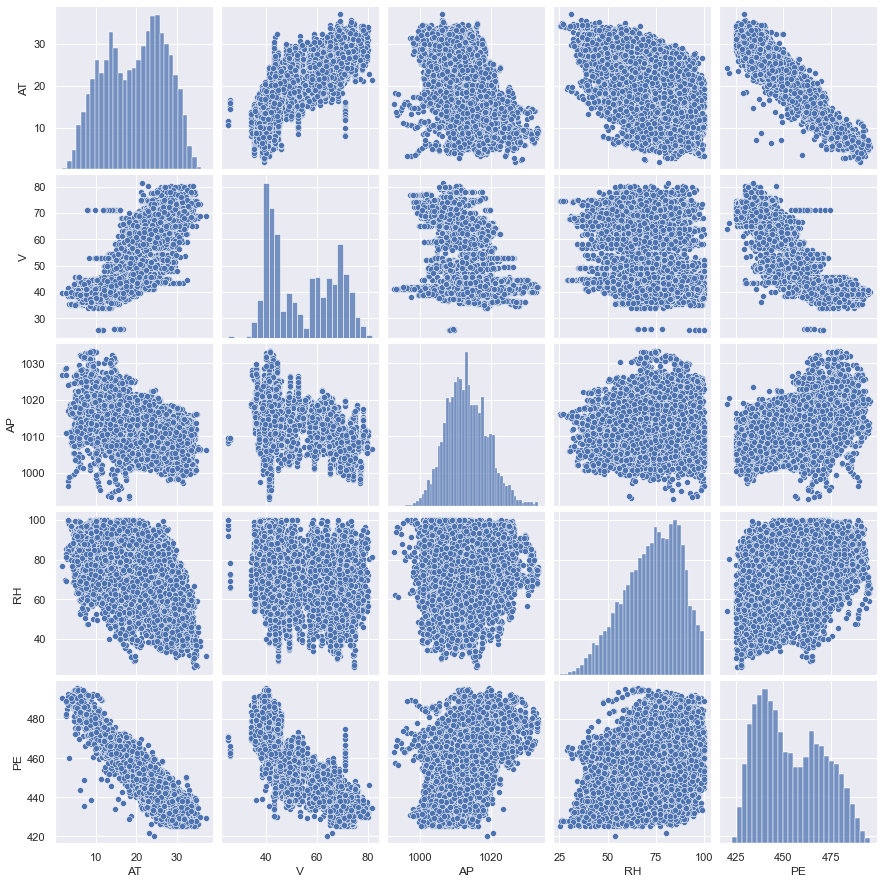

In [6]:
sns.pairplot(df)

c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


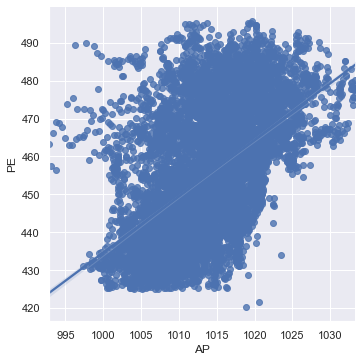

In [7]:
sns.lmplot('AP', 'PE', data=df)

c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


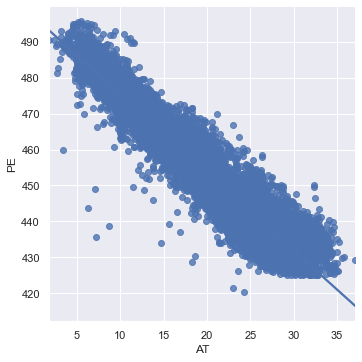

In [8]:
sns.lmplot('AT', 'PE', data=df)

In [9]:
df.corr()

,AT,V,AP,RH,PE
AT,1.000000,0.844107,-0.507549,-0.542535,-0.948128
V,0.844107,1.000000,-0.413502,-0.312187,-0.869780
AP,-0.507549,-0.413502,1.000000,0.099574,0.518429
RH,-0.542535,-0.312187,0.099574,1.000000,0.389794
PE,-0.948128,-0.869780,0.518429,0.389794,1.000000


<AxesSubplot:>

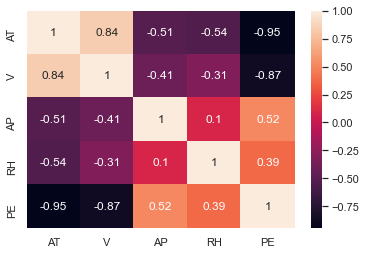

In [10]:
sns.heatmap(df.corr(), annot=True)

# Splitting the data in train and test

In [11]:
X = df.drop('PE', axis=1)
y = df['PE']

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Making Pipeline and prediction

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

In [15]:
pipe = make_pipeline(StandardScaler(), LinearRegression())

In [16]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [17]:
prediction = pipe.predict(X_test)

In [18]:
prediction

array([435.84487386, 437.44757676, 461.25214944, ..., 450.97887433,
       483.40680876, 435.47926756])

In [19]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

Text(0, 0.5, 'Predicted Y')

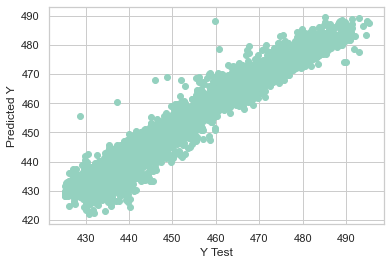

In [20]:
plt.scatter(y_test,prediction)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [21]:
pipe.score(X_test, y_test)

0.9305406769611295

# Save the model

In [22]:
import pickle

In [23]:
file_name = 'Power_plant_model.sav'
pickle.dump(pipe, open(file_name, 'wb'))

In [24]:
#To load the model we can use 
#load_model = pickle.load(open(file_name, 'rb'))

# Let's try with Random Forest Regression

In [25]:
from sklearn.ensemble import RandomForestRegressor

In [26]:
pipe1 = make_pipeline(StandardScaler(), RandomForestRegressor())

In [27]:
pipe1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor', RandomForestRegressor())])

In [29]:
prediction1 = pipe1.predict(X_test)
prediction1

array([436.2766, 434.7869, 458.1521, ..., 452.4382, 485.6439, 440.3614])

Text(0, 0.5, 'Predicted Y1')

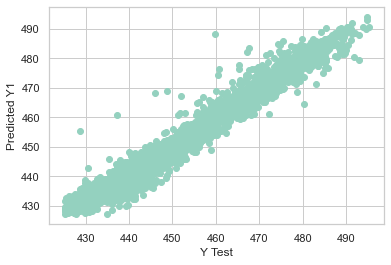

In [41]:
plt.scatter(y_test,prediction1,)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y1')

In [31]:
pipe1.score(X_test, y_test)

0.9632399964578677

Comparing the pipe score clearly indicating the performance. And we can see Random Forest Regression is performing better than Linear Regression